###### Time Series White Noise Analysis
Developing a better conceptual understanding off White Noise and applying this understanding to Time Series Analysis and Modelling

A white noise time series is simply a sequqnce of uncorrelated random features that are identically distributed. Stock returns are often modelled as white noise.

White Noise is a series with:
- constant mean
- constant variance
- zero autocorrealtion at all lags

We will be testing the above statement regarding white noise.

Unfortunately, for white noise, we cannot forecast future observations based on historic data - autocorrelations are zero

In [106]:
#import required libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

##### Randomly Generate & Visualize White Noise 
- Line Plot Analysis
- Histogram/Kernel Density Plot

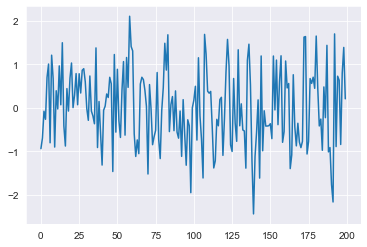

In [112]:
#Randomly Generate White Noise
noise = np.random.normal(loc=0, scale = 1, size = 200)
plt.plot(noise)

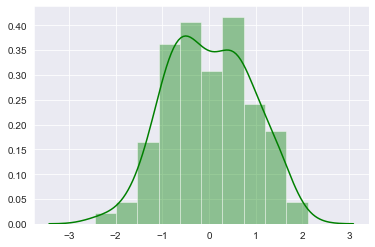

In [113]:
#Generate a hist/kernel density plot of generated white noise
sns.distplot(noise,kde = True, hist = True, color = 'g')
sns.set_style('darkgrid')
plt.show()

###### Randomly Generate Data for Comparitive Analysis

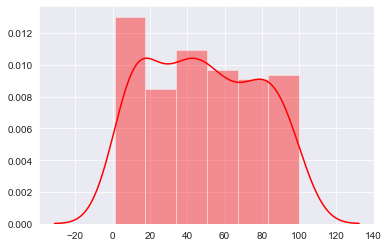

In [124]:
#Generate random data
randomdata = []
for i in range(0,200):
    n = random.randint(1,100)
    randomdata.append(n)

#plot random data
sns.distplot(randomdata,kde = True, hist = True, color = 'r')
sns.set_style('darkgrid')
plt.show()

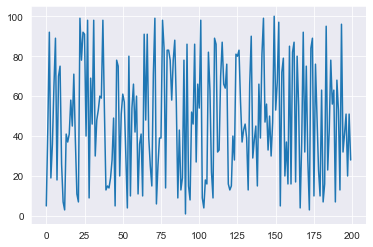

In [125]:
plt.plot(randomdata)

##### Sub - Plot Comparative Analysis

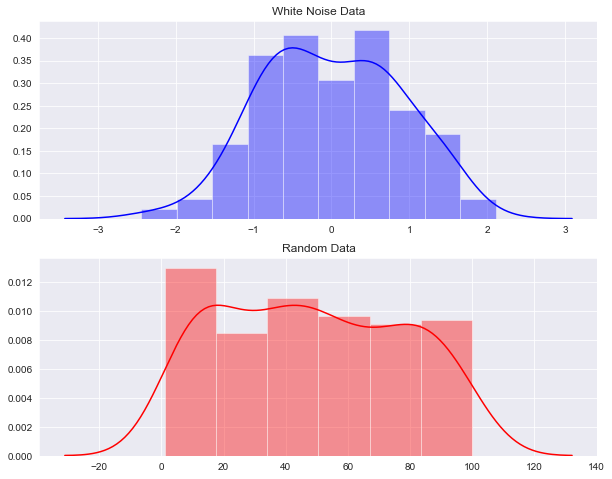

In [126]:
#Sub-Plot (Histogram/Kernel Density Plot)
fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_size_inches(10, 8)
sns.distplot(noise, kde = True, hist = True, color = 'b', ax=ax1).set_title('White Noise Data')
sns.distplot(randomdata, kde = True, hist = True, color = 'r', ax=ax2).set_title('Random Data')
plt.show()

##### Build Data-Frame from the above generated data 

In [127]:
#Build Dataframe holding white noise
df = pd.DataFrame(noise, columns=['white noise data'])
#Add column to the dataframe
df['random data'] = randomdata
df, df.describe()

(     white noise data  random data
 0           -0.940137            5
 1           -0.693913           44
 2           -0.077168           92
 3           -0.263113           19
 4            0.702129           36
 ..                ...          ...
 195          0.636533           41
 196         -0.843421           51
 197          0.795508           20
 198          1.391822           51
 199          0.208389           28
 
 [200 rows x 2 columns],
        white noise data  random data
 count        200.000000   200.000000
 mean           0.006004    48.455000
 std            0.890390    29.160412
 min           -2.442475     1.000000
 25%           -0.694874    20.000000
 50%           -0.022887    46.500000
 75%            0.678523    75.250000
 max            2.110051   100.000000)

###### Autocorrelation Testing

In [128]:
#Compute the autocorrelation of both sets of data
#White Noise Data Autocorrelation
autocorr = df['white noise data'].autocorr()
print('The autocrrelation of White Noise', autocorr)
print('This result was approximated in advance of calculations and confirms the statement that white noise has zero autocorrelation')

#Random Data Autocorrelation
autocorr1 = df['random data'].autocorr()
print('The autocrrelation of random data', autocorr1)
print('When we compare this to White Noise we can clearly see the difference in generated values')

The autocrrelation of White Noise 0.11740461255442695
This result was approximated in advance of calculations and confirms the statement that white noise has zero autocorrelation
The autocrrelation of random data -0.04366875300179173
When we compare this to White Noise we can clearly see the difference in generated values


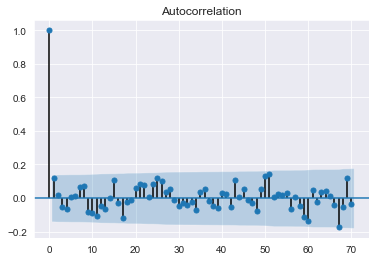

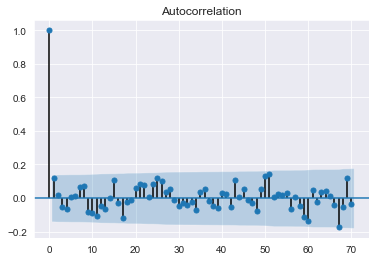

In [134]:
#Autocorrelation Function (White Noise Visual Analysis)
plot_acf(df['white noise data'], lags = 70, alpha = 0.05)

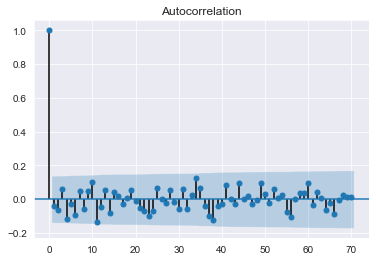

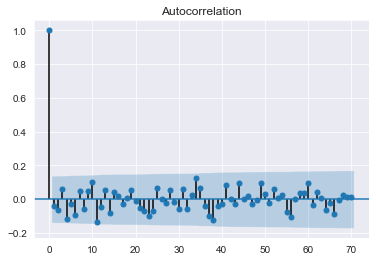

In [132]:
#Autocorrelation Function (White Noise Visual Analysis)
plot_acf(df['random data'], lags = 70, alpha = 0.05)